<a href="https://colab.research.google.com/github/DanielBojchovski/best_investment_and_best_player_in_nba/blob/main/nba_best_investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
nba_data = pd.read_csv("/content/sample_data/nba_salary_stats.csv")
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


In [41]:
# Check for nans in columns
nba_data.isna().sum()

first_name    0
last_name     0
team          0
salary        0
pos           0
age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg%           0
3p            0
3pa           0
3p%           0
2p            0
2pa           0
2p%           0
efg%          0
ft            0
fta           0
ft%           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
dtype: int64

In [42]:
nba_data.shape

(289, 31)

Filtering out the players with less than full 10 games. 1 game is 48 mins and we have stat mp which is minutes played.

In [43]:
filtered_nba_data= nba_data[nba_data["mp"] > 480]

In [44]:
filtered_nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


In [45]:
filtered_nba_data.shape

(246, 31)

In [46]:
nba_data_numeric = filtered_nba_data.copy() 
del nba_data_numeric["first_name"] 
del nba_data_numeric["last_name"]
del nba_data_numeric["team"]
del nba_data_numeric["pos"]

In [47]:
# Because age is not a game stat i'm going to delete it
del nba_data_numeric["age"]

In [48]:
nba_data_numeric

,salary,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,73,28,1725,265,603,0.439,56,156,0.359,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,56,56,1825,406,729,0.557,0,6,0.000,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,47,12,1050,252,458,0.550,14,46,0.304,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,66,61,1805,255,569,0.448,159,389,0.409,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,56,56,1809,369,545,0.677,1,10,0.100,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2000000.0,49,0,1072,146,317,0.461,41,121,0.339,...,0.545,75,145,220,108,44,10,46,81,363
282,5000000.0,56,0,799,125,320,0.391,37,102,0.363,...,0.859,16,71,87,105,28,3,43,48,354
285,13666667.0,68,67,2094,440,878,0.501,131,336,0.390,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,77,8,1452,122,269,0.454,44,116,0.379,...,0.857,50,170,220,188,93,19,45,56,342


In [49]:
# Summarize the data
print(nba_data_numeric.describe())

             salary           g          gs           mp          fg  \
count  2.460000e+02  246.000000  246.000000   246.000000  246.000000   
mean   9.966709e+06   62.093496   35.349593  1565.280488  272.313008   
std    1.050715e+07   12.692413   26.210758   568.839282  153.606294   
min    5.318000e+03   25.000000    0.000000   516.000000   32.000000   
25%    2.175988e+06   54.250000   11.250000  1104.000000  152.250000   
50%    5.056500e+06   65.000000   30.000000  1588.000000  246.500000   
75%    1.393750e+07   72.000000   62.500000  2042.750000  352.750000   
max    4.578097e+07   82.000000   80.000000  2743.000000  774.000000   

               fga         fg%          3p         3pa         3p%  ...  \
count   246.000000  246.000000  246.000000  246.000000  246.000000  ...   
mean    588.735772    0.463341   85.199187  238.471545    0.334589  ...   
std     323.041034    0.064733   62.152585  162.140822    0.090655  ...   
min      60.000000    0.324000    0.000000    1.000

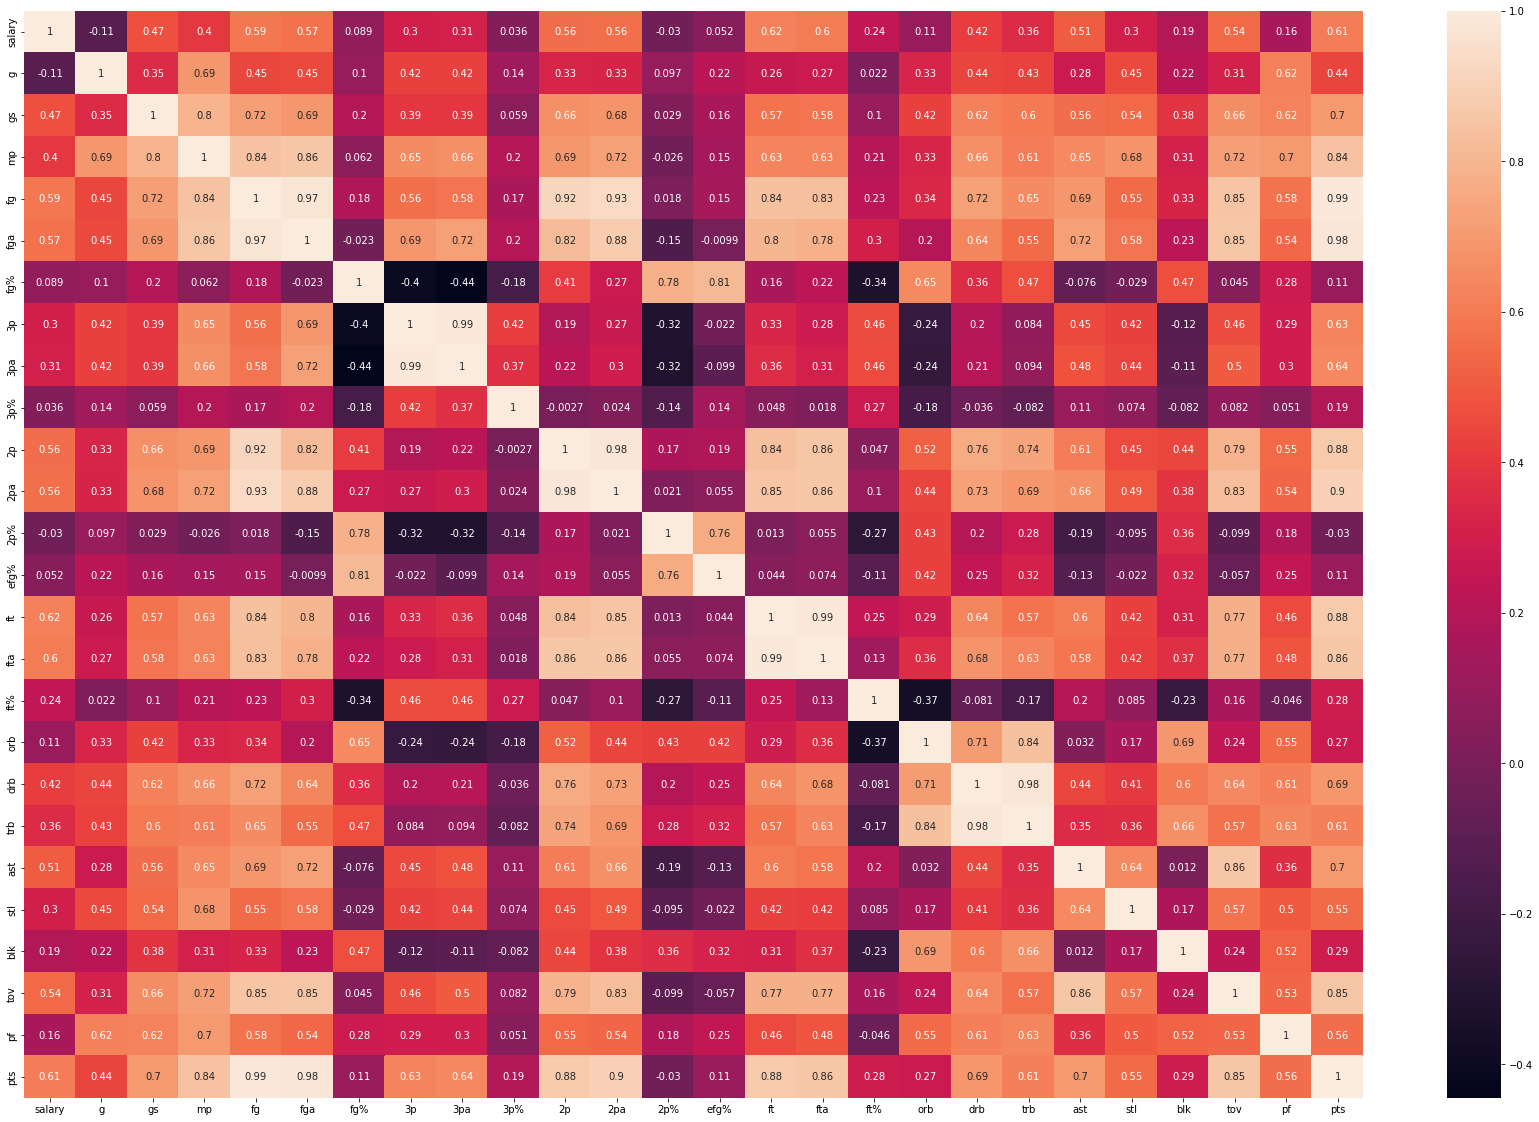

In [50]:
plt.figure(figsize=(30, 20))
sns.heatmap(nba_data_numeric.corr(),  annot=True)

In [51]:
average_for_every_column = nba_data_numeric.mean(axis=0)
average_for_every_column.round(1)

salary    9966709.1
g              62.1
gs             35.3
mp           1565.3
fg            272.3
fga           588.7
fg%             0.5
3p             85.2
3pa           238.5
3p%             0.3
2p            187.1
2pa           350.3
2p%             0.5
efg%            0.5
ft            112.6
fta           144.2
ft%             0.8
orb            62.5
drb           222.4
trb           284.9
ast           161.8
stl            50.9
blk            30.5
tov            85.9
pf            125.3
pts           742.5
dtype: float64

In [52]:
average_salary = round(nba_data_numeric["salary"].mean(), 1)
average_salary

9966709.1

In [53]:
average_stats = [62.1, 35.3, 1565.3, 272.3, 588.7, 0.5, 85.2, 238.5, 0.3, 187.1 ,350.3 , 0.5, 0.5, 112.6, 144.2, 0.8, 62.5, 222.4, 284.9, 161.8, 50.9, 30.5, 85.9, 125.3, 742.5]

With the average stats and the average salary we get imaginary average player. And based on him we will see if the other players are overperforming or underperforming

In [54]:
nba_data_numeric.corr()

,salary,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
salary,1.000000,-0.113368,0.472923,0.399640,0.589325,0.566305,0.088719,0.301253,0.310058,0.036009,...,0.240175,0.111839,0.418400,0.355657,0.508658,0.304464,0.190804,0.543769,0.157370,0.606690
g,-0.113368,1.000000,0.352170,0.692943,0.446306,0.450212,0.101086,0.419224,0.422198,0.135111,...,0.022201,0.330924,0.437921,0.434736,0.277400,0.449456,0.220616,0.313147,0.616476,0.440824
gs,0.472923,0.352170,1.000000,0.796533,0.715214,0.692204,0.200028,0.390565,0.393418,0.059237,...,0.103003,0.419066,0.616409,0.598271,0.559058,0.543370,0.382051,0.658333,0.622209,0.700179
mp,0.399640,0.692943,0.796533,1.000000,0.844046,0.858136,0.062041,0.652099,0.662949,0.202118,...,0.206815,0.329167,0.663362,0.608250,0.647282,0.681522,0.307717,0.717712,0.697281,0.843789
fg,0.589325,0.446306,0.715214,0.844046,1.000000,0.972742,0.180786,0.564286,0.581821,0.166024,...,0.225436,0.339970,0.719051,0.654395,0.694995,0.553256,0.326102,0.850318,0.576682,0.989725
fga,0.566305,0.450212,0.692204,0.858136,0.972742,1.000000,-0.023182,0.690247,0.718036,0.202807,...,0.303762,0.195572,0.638114,0.549728,0.722877,0.577957,0.225235,0.853870,0.540783,0.980265
fg%,0.088719,0.101086,0.200028,0.062041,0.180786,-0.023182,1.000000,-0.404696,-0.444906,-0.176722,...,-0.336641,0.649811,0.360356,0.468031,-0.075964,-0.029393,0.465078,0.044765,0.279752,0.108034
3p,0.301253,0.419224,0.390565,0.652099,0.564286,0.690247,-0.404696,1.000000,0.988297,0.416021,...,0.458617,-0.240018,0.199212,0.083653,0.449422,0.422621,-0.118770,0.463197,0.289429,0.626125
3pa,0.310058,0.422198,0.393418,0.662949,0.581821,0.718036,-0.444906,0.988297,1.000000,0.368869,...,0.455756,-0.243792,0.214511,0.094360,0.479225,0.439072,-0.105282,0.502180,0.299849,0.643372
3p%,0.036009,0.135111,0.059237,0.202118,0.166024,0.202807,-0.176722,0.416021,0.368869,1.000000,...,0.273354,-0.184298,-0.035889,-0.081551,0.106992,0.074336,-0.081977,0.082136,0.050786,0.190805


In [55]:
stats_importance = [-0.113368,0.472923,0.399640,0.589325,0.566305,0.088719,0.301253,0.310058,0.036009,0.555886,0.563513,-0.030480,0.051518,0.617331,0.600009,0.240175,0.111839,0.418400,0.355657,0.508658,0.304464,0.190804,0.543769,0.157370,0.606690]

In [56]:
coefficient_average = 0
for i in range(25):
  coefficient_average += average_stats[i] * stats_importance[i]

print(coefficient_average)

2508.2604487000003


The average players has 2508.2609564999393 coefficient

In [57]:
new_file = []
for i in range(246):
  player_points = [
                   nba_data["g"][i], 
                   nba_data["gs"][i], 
                   nba_data["mp"][i],
                   nba_data["fg"][i],
                   nba_data["fga"][i],
                   nba_data["fg%"][i],
                   nba_data["3p"][i],
                   nba_data["3pa"][i],
                   nba_data["3p%"][i],
                   nba_data["2p"][i],
                   nba_data["2pa"][i],
                   nba_data["2p%"][i],
                   nba_data["efg%"][i],
                   nba_data["ft"][i],
                   nba_data["fta"][i],
                   nba_data["ft%"][i],
                   nba_data["orb"][i],
                   nba_data["drb"][i],
                   nba_data["trb"][i],
                   nba_data["ast"][i],
                   nba_data["stl"][i],
                   nba_data["blk"][i],
                   nba_data["tov"][i],
                   nba_data["pf"][i],
                   nba_data["pts"][i]
                   ]
  coefficient = np.sum(np.multiply(player_points, stats_importance))
  real_salary = average_salary * coefficient / coefficient_average
  difference = float(nba_data["salary"][i]) - real_salary
  new_data = [nba_data["first_name"][i], nba_data["last_name"][i], nba_data["salary"][i], round(real_salary, 1), round(difference, 1)]
 
  new_file.append(new_data)

In [58]:
index_values = range(1, 247, 1)
column_values = ['first_name', 'last_name', 'salary_in_nba', 'deserved_salary','difference_between_salaries']
df = pd.DataFrame(data = new_file, 
                  index = index_values, 
                  columns = column_values)

df

,first_name,last_name,salary_in_nba,deserved_salary,difference_between_salaries
1,Precious,Achiuwa,2711280.0,10357931.7,-7646651.7
2,Bam,Adebayo,28103550.0,14615256.4,13488293.6
3,LaMarcus,Aldridge,2641691.0,7723009.4,-5081318.4
4,Grayson,Allen,4054695.0,9283202.8,-5228507.8
5,Jarrett,Allen,20000000.0,12385531.0,7614469.0
...,...,...,...,...,...
242,Marcus,Smart,14339285.0,12928103.0,1411182.0
243,Dennis,Smith,1789256.0,3651124.6,-1861868.6
244,Lamar,Stevens,1517981.0,5641368.6,-4123387.6
245,Isaiah,Stewart,3277080.0,10298660.9,-7021580.9


Based on this table we can see which player is good investment and which isn't


Let's see the best 20 investments

In [59]:
df.sort_values("difference_between_salaries").head(20)

,first_name,last_name,salary_in_nba,deserved_salary,difference_between_salaries
45,Jalen,Brunson,1802057.0,16716368.5,-14914311.5
216,Jordan,Poole,2161440.0,16417542.7,-14256102.7
17,Desmond,Bane,2033160.0,16141966.1,-14108806.1
134,Keldon,Johnson,2145720.0,16096717.0,-13950997.0
70,Luka,Doncic,10174391.0,22441609.5,-12267218.5
89,Darius,Garland,7040880.0,18249782.0,-11208902.0
181,Malik,Monk,1789256.0,12962488.6,-11173232.6
14,LaMelo,Ball,8231760.0,19383159.7,-11151399.7
10,Cole,Anthony,3449400.0,14568328.3,-11118928.3
217,Kevin,Porter,2130240.0,12888867.3,-10758627.3


While we here, based on the deserved_salary column we can see the top 20 players in nba

In [60]:
df.sort_values("deserved_salary", ascending=False).head(20)

,first_name,last_name,salary_in_nba,deserved_salary,difference_between_salaries
67,DeMar,DeRozan,26000000.0,24976825.4,1023174.6
135,Nikola,Jokic,30510423.0,24859098.3,5651324.7
79,Joel,Embiid,31579390.0,24537339.2,7042050.8
8,Giannis,Antetokounmpo,39344970.0,23790515.7,15554454.3
70,Luka,Doncic,10174391.0,22441609.5,-12267218.5
34,Devin,Booker,31610000.0,20815412.4,10794587.6
239,Pascal,Siakam,31320000.0,20388742.4,10931257.6
226,Julius,Randle,19800000.0,20289820.5,-489820.5
187,Dejounte,Murray,15428571.0,19738306.9,-4309735.9
179,Donovan,Mitchell,28103550.0,19553360.8,8550189.2


I don't know if this data is accurate. I don't know anything about basketball, but Jokic, Doncic and Antetokounmpo are all over the sports news which implies that this analysis is probably correct. With all this in mind, Doncic is probably the best investment in every way. He is in top 5 underrated players and in top 5 best players.